In [14]:
# %%  ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî  EVALUATE MODEL ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
import torch, torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms
from model.cnn import miniVGG   # ho·∫∑c simpleCNN
# ====== TH√îNG S·ªê ======
device = 'cuda' if torch.cuda.is_available() else 'cpu'
CKPT_PATH = "Models/classification_best.pt"   # file l∆∞u t·ªët nh·∫•t
IMG_SIZE = 224
BATCH_SIZE = 32
ROOT = "C:/TRAIN/Deep Learning/vietnamese-foods/Images"   # <== ƒë·ªïi n·∫øu c·∫ßn
root_train = f"{ROOT}/Train"
root_val   = f"{ROOT}/Validate"
root_test  = f"{ROOT}/Test"
# ====== TRANSFORM GI·ªêNG L√öC TRAIN ======
test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])
# ====== DATASET / DATALOADER ======
test_set = ImageFolder(root_test, transform=test_transform)
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False)
CLASS_NAMES = test_set.classes
print("S·ªë l·ªõp:", len(CLASS_NAMES))
print("V√≠ d·ª• l·ªõp:", CLASS_NAMES[:33])

S·ªë l·ªõp: 33
V√≠ d·ª• l·ªõp: ['Banh beo', 'Banh bot loc', 'Banh can', 'Banh canh', 'Banh chung', 'Banh cuon', 'Banh duc', 'Banh gio', 'Banh khot', 'Banh mi', 'Banh pia', 'Banh tet', 'Banh trang nuong', 'Banh xeo', 'Bun bo Hue', 'Bun dau mam tom', 'Bun mam', 'Bun rieu', 'Bun thit nuong', 'Ca kho to', 'Canh chua', 'Cao lau', 'Chao long', 'Com tam', 'Goi cuon', 'Hu tieu', 'Mi quang', 'Nem chua', 'Pho', 'Xoi xeo', 'banh_da_lon', 'banh_tieu', 'banh_trung_thu']


In [15]:
# ====== KH·ªûI T·∫†O M√î H√åNH ======
ckpt = torch.load(CKPT_PATH, map_location=device)

# ‚úÖ L·∫•y ƒë√∫ng nh√°nh ch·ª©a state_dict
if "net" in ckpt:
    state_dict = ckpt["net"]
elif "model_state_dict" in ckpt:
    state_dict = ckpt["model_state_dict"]
else:
    state_dict = ckpt  # fallback n·∫øu file l√† state_dict thu·∫ßn

# ‚úÖ B·ªè ti·ªÅn t·ªë 'module.' n·∫øu c√≥ (tr∆∞·ªùng h·ª£p b·∫°n train b·∫±ng DataParallel)
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k.replace("module.", "")  # lo·∫°i b·ªè ti·ªÅn t·ªë module.
    new_state_dict[name] = v

# ‚úÖ Load state_dict an to√†n
missing, unexpected = model.load_state_dict(new_state_dict, strict=False)
if missing:
    print("‚ö†Ô∏è Missing keys:", missing)
if unexpected:
    print("‚ö†Ô∏è Unexpected keys:", unexpected)

model.eval()
print("‚úÖ ƒê√£ load m√¥ h√¨nh th√†nh c√¥ng:", CKPT_PATH)


‚úÖ ƒê√£ load m√¥ h√¨nh th√†nh c√¥ng: Models/classification_best.pt


C:\Users\Admin\AppData\Local\Temp\ipykernel_27988\3735505895.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(CKPT_PATH, map_location=device)


In [19]:
# %% 0. IMPORTS & DATA
import os, numpy as np, torch, torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu'
IMG_SIZE   = 224
BATCH_SIZE = 32

# ƒê·ªïi th∆∞ m·ª•c n·∫øu b·∫°n ƒë·ªÉ n∆°i kh√°c
TEST_DIR = r"C:/TRAIN/Deep Learning/vietnamese-foods/Images/Test"

# Transform gi·ªëng l√∫c train/infer
test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),                 # n·∫øu l√∫c train c√≥ Normalize th√¨ th√™m Normalize v√†o ƒë√¢y
])

test_set   = ImageFolder(TEST_DIR, transform=test_transform)
test_loader= DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False)
CLASS_NAMES= test_set.classes
NUM_CLASSES= len(CLASS_NAMES)

print("Test samples:", len(test_set))
print("S·ªë l·ªõp:", NUM_CLASSES)
print("V√≠ d·ª• l·ªõp:", CLASS_NAMES[:10])

Test samples: 5101
S·ªë l·ªõp: 33
V√≠ d·ª• l·ªõp: ['Banh beo', 'Banh bot loc', 'Banh can', 'Banh canh', 'Banh chung', 'Banh cuon', 'Banh duc', 'Banh gio', 'Banh khot', 'Banh mi']


In [18]:
# %% 1. EVALUATE ‚Äì y_true, y_pred, y_prob
@torch.no_grad()
def evaluate_collect(model, loader, device='cpu'):
    model.eval()
    y_true, y_pred = [], []
    y_prob_rows = []

    for x, y in loader:
        x, y = x.to(device), y.to(device)
        logits = model(x)
        probs  = F.softmax(logits, dim=1)
        pred   = probs.argmax(dim=1)

        y_true.extend(y.cpu().tolist())
        y_pred.extend(pred.cpu().tolist())
        y_prob_rows.append(probs.cpu().numpy())

    y_prob = np.concatenate(y_prob_rows, axis=0)   # [N, C]
    acc = (np.array(y_true) == np.array(y_pred)).mean()
    print(f"‚úÖ Test Accuracy: {acc*100:.2f}%")
    return y_true, y_pred, y_prob

y_true, y_pred, y_prob = evaluate_collect(model, test_loader, device)


‚úÖ Test Accuracy: 67.69%


In [20]:
# %% 2. Classification Report
print(classification_report(y_true, y_pred, target_names=CLASS_NAMES, digits=2))

                  precision    recall  f1-score   support

        Banh beo       0.76      0.70      0.73       129
    Banh bot loc       0.72      0.56      0.63       144
        Banh can       0.71      0.60      0.65       149
       Banh canh       0.46      0.33      0.38       193
      Banh chung       0.60      0.52      0.56       102
       Banh cuon       0.62      0.75      0.68       228
        Banh duc       0.49      0.24      0.32       133
        Banh gio       0.68      0.74      0.71       129
       Banh khot       0.76      0.66      0.71       167
         Banh mi       0.82      0.88      0.85       268
        Banh pia       0.73      0.81      0.77        89
        Banh tet       0.62      0.55      0.58       138
Banh trang nuong       0.82      0.72      0.77       159
        Banh xeo       0.71      0.72      0.71       235
      Bun bo Hue       0.68      0.74      0.71       306
 Bun dau mam tom       0.79      0.94      0.86       184
         Bun 

In [37]:
# %% CR ‚Üí DataFrame
import pandas as pd
from sklearn.metrics import classification_report

report = classification_report(
    y_true, y_pred,
    target_names=CLASS_NAMES,
    output_dict=True,        # <‚Äî quan tr·ªçng ƒë·ªÉ l·∫•y dict
    zero_division=0
)

df_cr = pd.DataFrame(report).T
# ch·ªâ gi·ªØ c√°c l·ªõp (b·ªè 'accuracy', 'macro avg', 'weighted avg'‚Ä¶)
df_cls = df_cr.iloc[:len(CLASS_NAMES)][['precision', 'recall', 'f1-score', 'support']].copy()
df_cls.index.name = 'class'
df_cls.reset_index(inplace=True)

df_summary = df_cr.loc[['macro avg', 'weighted avg']][['precision','recall','f1-score']]
df_cls.head()


class  precision    recall  f1-score  support
0      Banh beo   0.762712  0.697674  0.728745    129.0
1  Banh bot loc   0.720721  0.555556  0.627451    144.0
2      Banh can   0.714286  0.604027  0.654545    149.0
3     Banh canh   0.457143  0.331606  0.384384    193.0
4    Banh chung   0.602273  0.519608  0.557895    102.0

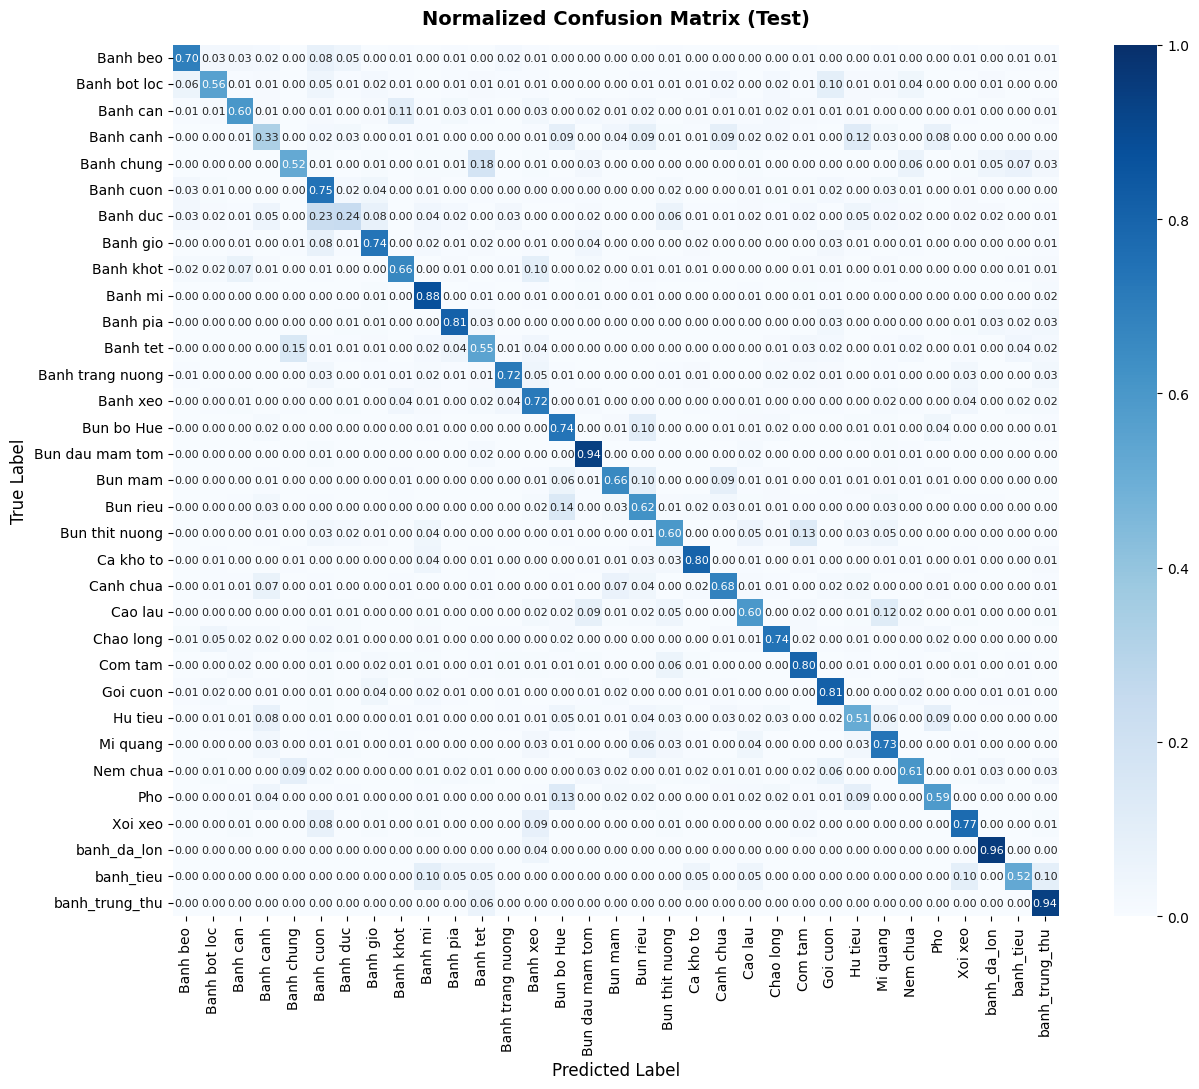

In [48]:
# %% 3. Confusion Matrix ‚Äì seaborn (hi·ªÉn th·ªã s·ªë)
cm = confusion_matrix(y_true, y_pred, labels=list(range(NUM_CLASSES)))
cm_norm = cm / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(13, 11))
sns.heatmap(
    cm_norm,
    cmap="Blues",
    vmin=0, vmax=1,
    annot=True,        # üëà Hi·ªÉn th·ªã s·ªë tr√™n t·ª´ng √¥
    fmt=".2f",         # üëà L√†m tr√≤n 2 ch·ªØ s·ªë th·∫≠p ph√¢n
    annot_kws={"size": 8},  # üëà K√≠ch th∆∞·ªõc ch·ªØ nh·ªè g·ªçn
    xticklabels=CLASS_NAMES,
    yticklabels=CLASS_NAMES
)
plt.title("Normalized Confusion Matrix (Test)", fontsize=14, weight="bold", pad=15)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [53]:
# %% CR ‚Üí DataFrame
import pandas as pd
from sklearn.metrics import classification_report

report = classification_report(
    y_true, y_pred,
    target_names=CLASS_NAMES,
    output_dict=True,        # <‚Äî quan tr·ªçng ƒë·ªÉ l·∫•y dict
    zero_division=0
)

df_cr = pd.DataFrame(report).T
# ch·ªâ gi·ªØ c√°c l·ªõp (b·ªè 'accuracy', 'macro avg', 'weighted avg'‚Ä¶)
df_cls = df_cr.iloc[:len(CLASS_NAMES)][['precision', 'recall', 'f1-score', 'support']].copy()
df_cls.index.name = 'class'
df_cls.reset_index(inplace=True)

df_summary = df_cr.loc[['macro avg', 'weighted avg']][['precision','recall','f1-score']]
df_cls.head()


class  precision    recall  f1-score  support
0      Banh beo   0.762712  0.697674  0.728745    129.0
1  Banh bot loc   0.720721  0.555556  0.627451    144.0
2      Banh can   0.714286  0.604027  0.654545    149.0
3     Banh canh   0.457143  0.331606  0.384384    193.0
4    Banh chung   0.602273  0.519608  0.557895    102.0

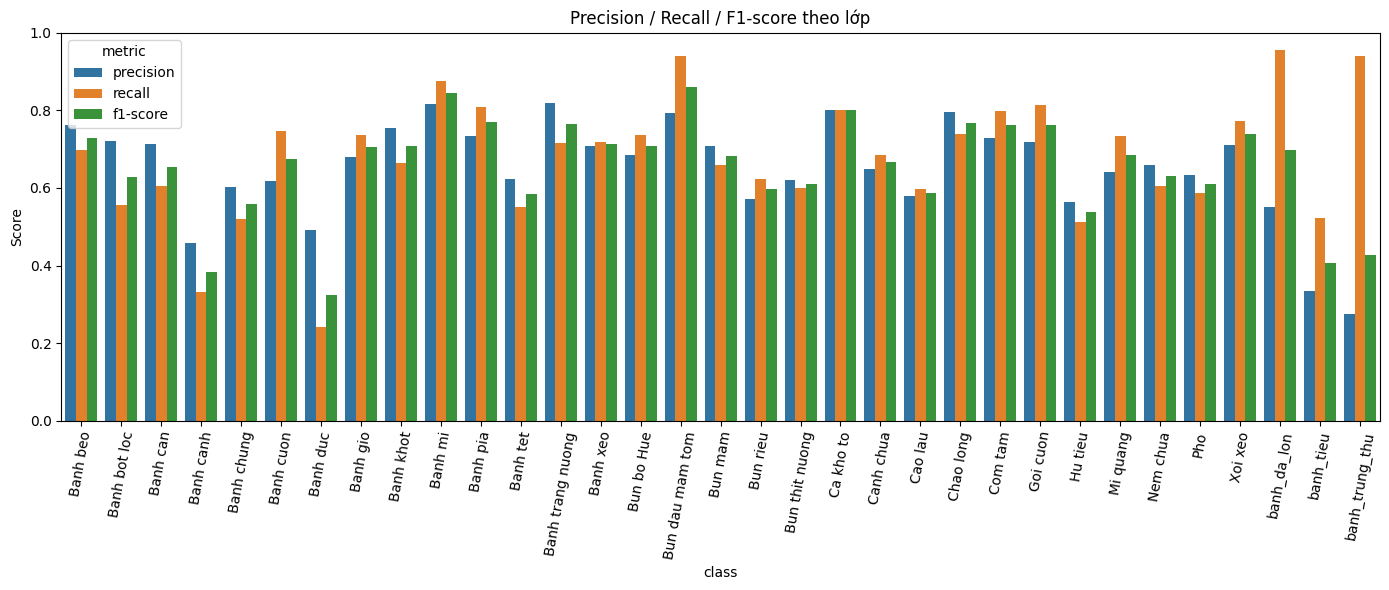

In [54]:
# %% Grouped barplot (per class)
import seaborn as sns
import matplotlib.pyplot as plt

long_df = df_cls.melt(
    id_vars=['class','support'],
    value_vars=['precision','recall','f1-score'],
    var_name='metric', value_name='score'
)

plt.figure(figsize=(14, 6))
sns.barplot(data=long_df, x='class', y='score', hue='metric')
plt.xticks(rotation=80)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Precision / Recall / F1-score theo l·ªõp')
plt.tight_layout()
plt.show()


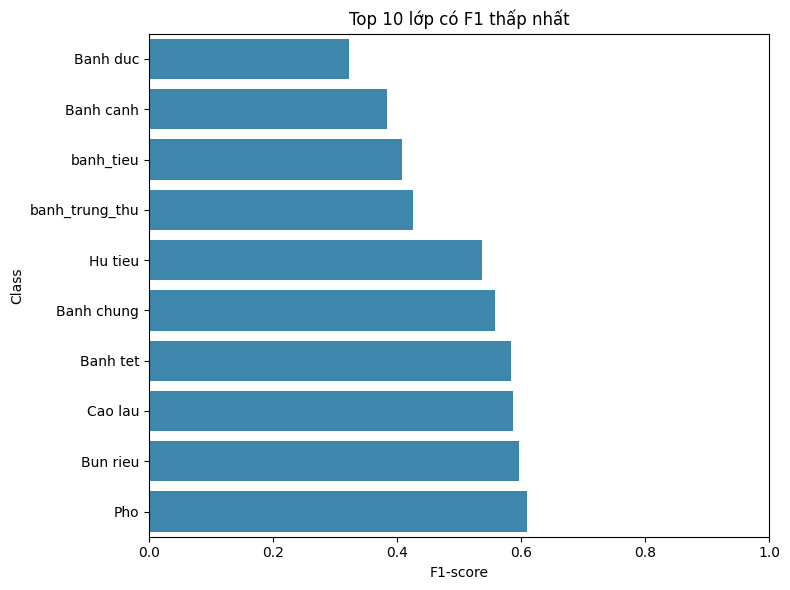

In [55]:
# %% Top-N l·ªõp F1 th·∫•p
TOP_N = 10
df_sorted = df_cls.sort_values('f1-score').head(TOP_N)

plt.figure(figsize=(8, 6))
sns.barplot(data=df_sorted, x='f1-score', y='class', color='#2b8cbe')
plt.xlim(0, 1)
plt.xlabel('F1-score')
plt.ylabel('Class')
plt.title(f'Top {TOP_N} l·ªõp c√≥ F1 th·∫•p nh·∫•t')
plt.tight_layout()
plt.show()


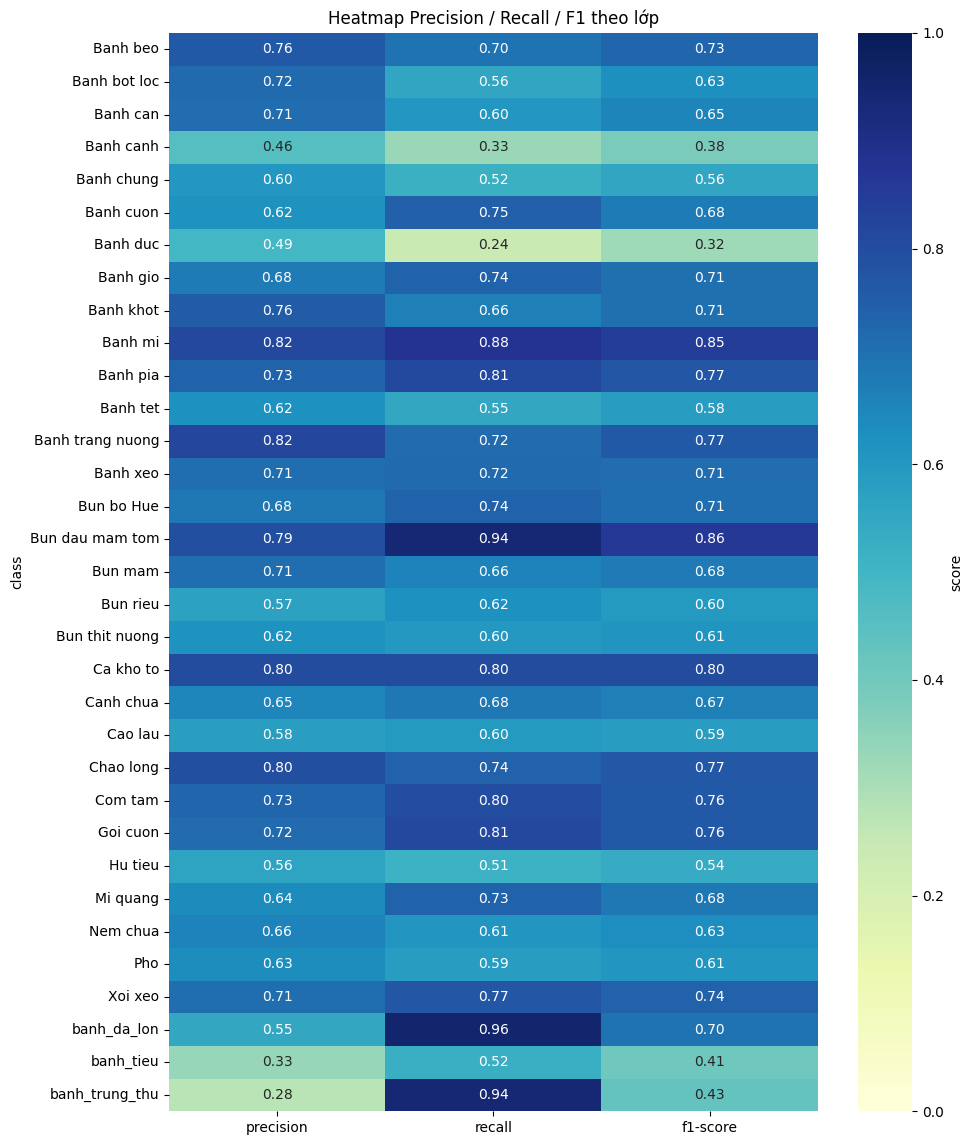

In [56]:
# %% Heatmap c√°c metric
m = df_cls.set_index('class')[['precision','recall','f1-score']]
plt.figure(figsize=(10, max(6, len(CLASS_NAMES)*0.35)))
sns.heatmap(m, annot=True, fmt=".2f", cmap="YlGnBu", vmin=0, vmax=1,
            cbar_kws={'label': 'score'})
plt.title('Heatmap Precision / Recall / F1 theo l·ªõp')
plt.tight_layout()
plt.show()


In [57]:
# %% Summary macro / weighted
display(df_summary.style.format("{:.3f}").set_caption("T√≥m t·∫Øt macro & weighted"))


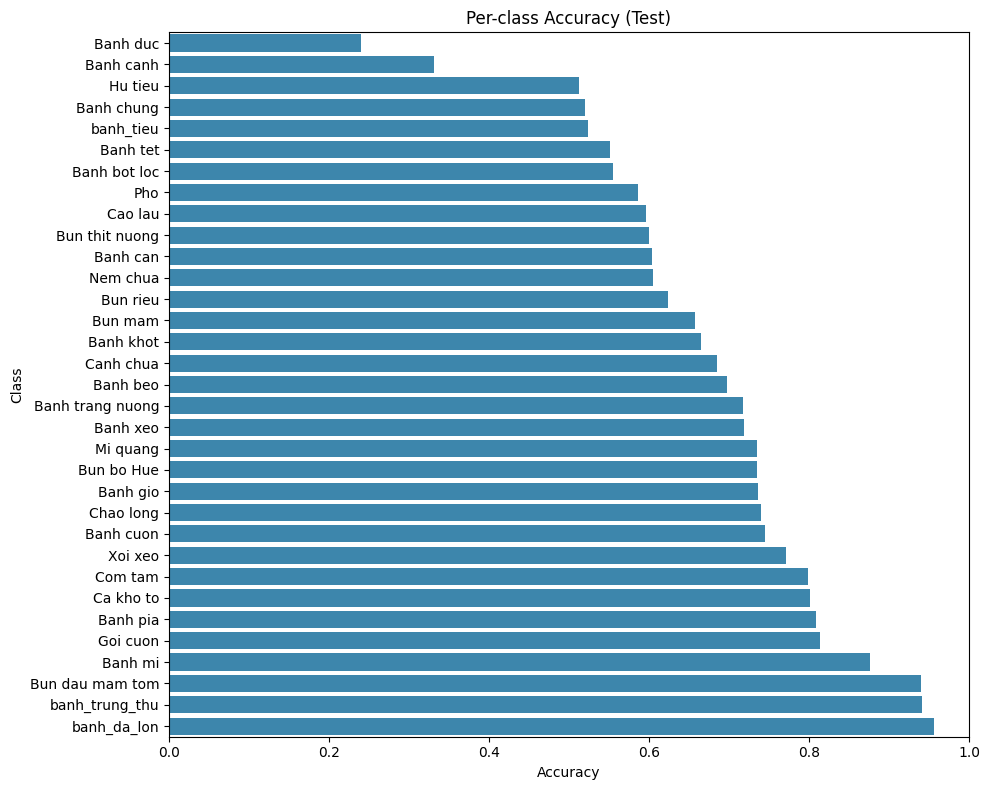

In [49]:
# %% 4. Per-class accuracy barplot
per_class_acc = (cm.diagonal() / cm.sum(axis=1)).astype(float)  # NaN n·∫øu l·ªõp kh√¥ng c√≥ m·∫´u
per_class_acc = np.nan_to_num(per_class_acc, nan=0.0)

order_idx = np.argsort(per_class_acc)   # s·∫Øp x·∫øp t·ª´ th·∫•p ƒë·∫øn cao
plt.figure(figsize=(10, 8))
sns.barplot(x=per_class_acc[order_idx], y=np.array(CLASS_NAMES)[order_idx], orient='h', color='#2b8cbe')
plt.xlim(0, 1)
plt.xlabel("Accuracy")
plt.ylabel("Class")
plt.title("Per-class Accuracy (Test)")
plt.tight_layout()
plt.show()

In [50]:
# %% 5. Top-5 Accuracy
top5_idx = np.argpartition(-y_prob, kth=5, axis=1)[:, :5]
top5_hit = np.array([t in top5 for t, top5 in zip(y_true, top5_idx)])
top5_acc = top5_hit.mean()
print(f"‚úÖ Top-5 Accuracy: {top5_acc*100:.2f}%")


‚úÖ Top-5 Accuracy: 91.69%


In [51]:
# ‚ÄúMost confused pairs‚Äù ‚Äì c·∫∑p l·ªõp hay b·ªã l·∫´n nh·∫•t
# %% 6. Top confused pairs
import itertools

cm_offdiag = cm.copy().astype(float)
np.fill_diagonal(cm_offdiag, 0)
pairs = []
for i, j in itertools.permutations(range(NUM_CLASSES), 2):
    if cm.sum(axis=1)[i] > 0:
        rate = cm[i, j] / cm.sum(axis=1)[i]
        pairs.append(((CLASS_NAMES[i], CLASS_NAMES[j]), rate))

pairs = sorted(pairs, key=lambda x: x[1], reverse=True)[:10]
print("Top-10 confused pairs (True ‚Üí Pred) (rate):")
for (ti, pj), r in pairs:
    print(f"  {ti:20s} ‚Üí {pj:20s} : {r:.3f}")


Top-10 confused pairs (True ‚Üí Pred) (rate):
  Banh duc             ‚Üí Banh cuon            : 0.233
  Banh chung           ‚Üí Banh tet             : 0.176
  Banh tet             ‚Üí Banh chung           : 0.152
  Bun rieu             ‚Üí Bun bo Hue           : 0.143
  Pho                  ‚Üí Bun bo Hue           : 0.130
  Bun thit nuong       ‚Üí Com tam              : 0.127
  Banh canh            ‚Üí Hu tieu              : 0.124
  Cao lau              ‚Üí Mi quang             : 0.121
  Banh can             ‚Üí Banh khot            : 0.107
  Bun bo Hue           ‚Üí Bun rieu             : 0.101


In [52]:
# %% 6B. Hi·ªÉn th·ªã ·∫£nh minh h·ªça c·∫∑p b·ªã nh·∫ßm
import random
from PIL import Image

# L·∫•y top 6 c·∫∑p d·ªÖ nh·∫ßm nh·∫•t
top_pairs = sorted(pairs, key=lambda x: x[2], reverse=True)[:6]

ncols = 3
plt.figure(figsize=(15, 10))

for idx, (true_cls, pred_cls, rate) in enumerate(top_pairs, 1):
    # L·∫•y ·∫£nh m·∫´u ng·∫´u nhi√™n t·ª´ l·ªõp th·∫≠t
    true_dir = os.path.join(TEST_DIR, true_cls)
    pred_dir = os.path.join(TEST_DIR, pred_cls)
    
    # ki·ªÉm tra c√≥ ·∫£nh
    true_imgs = [f for f in os.listdir(true_dir) if f.lower().endswith(('.jpg','.png','.jpeg'))]
    pred_imgs = [f for f in os.listdir(pred_dir) if f.lower().endswith(('.jpg','.png','.jpeg'))]
    
    if not true_imgs or not pred_imgs:
        continue  # b·ªè qua n·∫øu thi·∫øu ·∫£nh

    img_true = Image.open(os.path.join(true_dir, random.choice(true_imgs))).convert('RGB')
    img_pred = Image.open(os.path.join(pred_dir, random.choice(pred_imgs))).convert('RGB')

    # ·∫£nh 1: th·∫≠t
    plt.subplot(6, ncols, (idx - 1) * ncols + 1)
    plt.imshow(img_true)
    plt.axis("off")
    plt.title(f"Th·∫≠t: {true_cls}", fontsize=10, color='green')

    # ·∫£nh 2: d·ª± ƒëo√°n nh·∫ßm
    plt.subplot(6, ncols, (idx - 1) * ncols + 2)
    plt.imshow(img_pred)
    plt.axis("off")
    plt.title(f"Nh·∫ßm th√†nh: {pred_cls}", fontsize=10, color='red')

    # √¥ 3: th√¥ng tin
    plt.subplot(6, ncols, (idx - 1) * ncols + 3)
    plt.axis("off")
    plt.text(0, 0.6, f"T·ªâ l·ªá nh·∫ßm: {rate*100:.2f}%", fontsize=11, weight='bold')
    plt.text(0, 0.3, f"‚Üí {true_cls} ‚Üí {pred_cls}", fontsize=10)

plt.suptitle("·∫¢nh minh h·ªça c√°c c·∫∑p b·ªã nh·∫ßm nhi·ªÅu nh·∫•t", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


IndexError: tuple index out of range